In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('telco_churn_data.csv')
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [12]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.shape

(7043, 21)

In [18]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [21]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

In [24]:
print("\nData Summary using describe():")
print(df.describe())


Data Summary using describe():
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [80]:
# Filter and display the DataFrame to keep only numerical columns for correlation calculation
numeric_cols = ['tenure', 'MonthlyCharges', 'SeniorCitizen']
correlation_matrix = df[numeric_cols].corr()

print("\nCorrelation Matrix for Numerical Columns:")
print(correlation_matrix)



Correlation Matrix for Numerical Columns:
                  tenure  MonthlyCharges  SeniorCitizen
tenure          1.000000        0.247900       0.016567
MonthlyCharges  0.247900        1.000000       0.220173
SeniorCitizen   0.016567        0.220173       1.000000


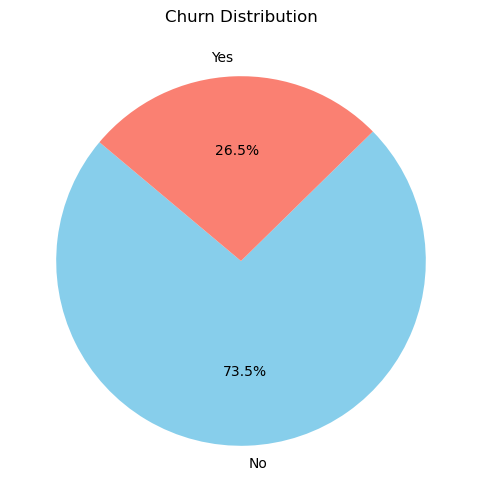

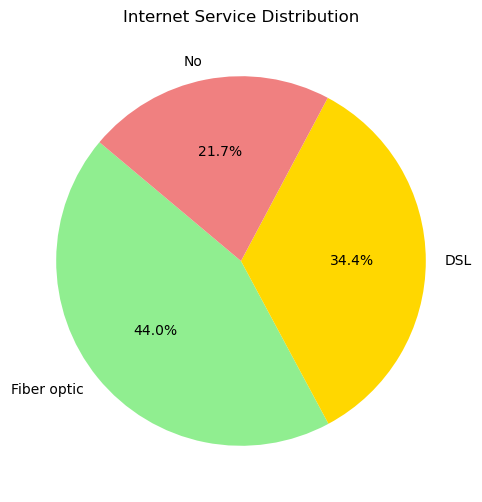

In [82]:
# Function to plot the churn distribution as a pie chart
def plot_churn_pie_chart1(df):
    churn_counts = df['Churn'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
    plt.title("Churn Distribution")
    plt.show()

# Function to plot the Internet Service distribution as a pie chart
def plot_churn_pie_chart2(df):
    internet_service_counts = df['InternetService'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(internet_service_counts, labels=internet_service_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'gold', 'lightcoral'])
    plt.title("Internet Service Distribution")

# Visualizations
plot_churn_pie_chart1(df)
plot_churn_pie_chart2(df)


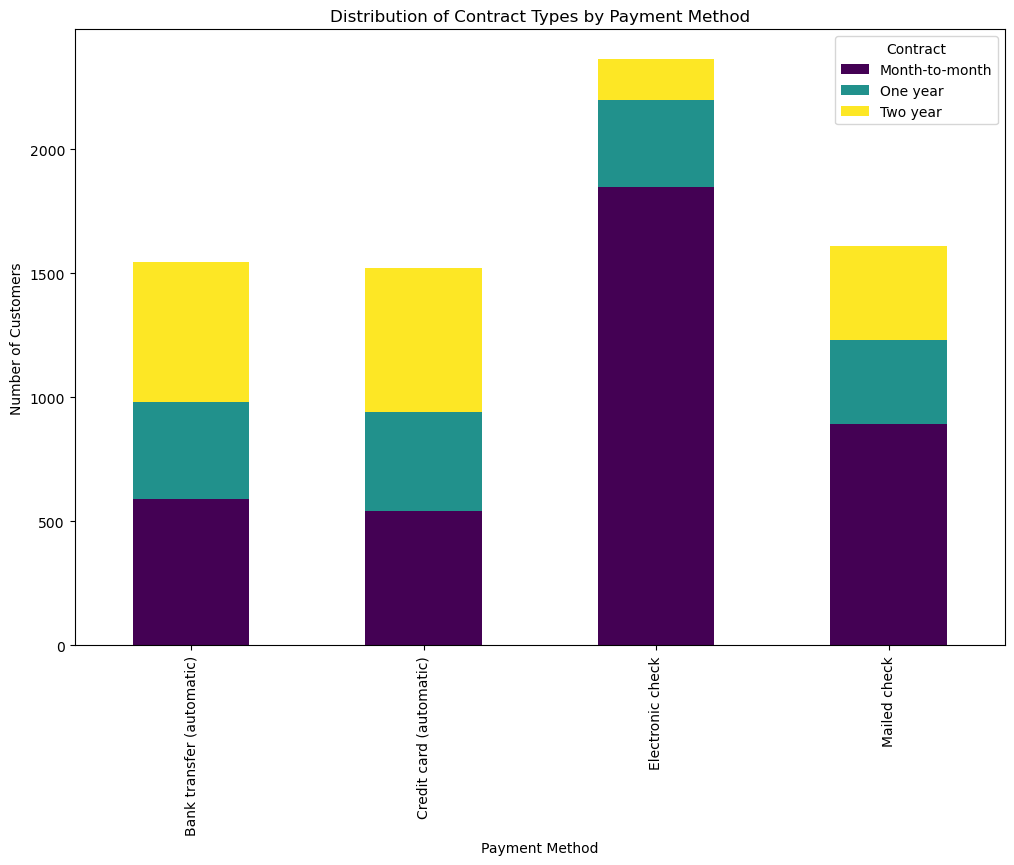

In [96]:
# Function to plot PaymentMethod vs Contract as a bar plot
def plot_payment_contract_distribution(df):
    payment_contract = df.groupby(['PaymentMethod', 'Contract']).size().unstack().fillna(0)
    payment_contract.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="viridis")
    plt.title("Distribution of Contract Types by Payment Method")
    plt.xlabel("Payment Method")
    plt.ylabel("Number of Customers")
    plt.show()

plot_payment_contract_distribution(df)

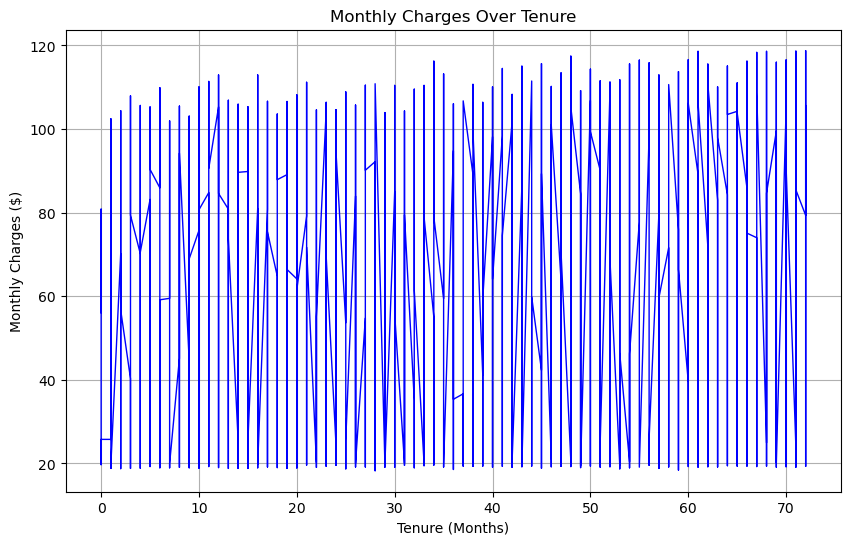

In [94]:
# Sort by tenure to ensure the line plot progresses over time
#df = df.sort_values(by="tenure")

# Function to plot MonthlyCharges over Tenure as a line graph
def plot_monthly_charges_over_tenure(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data['tenure'], data['MonthlyCharges'], color='blue', linewidth=1)
    plt.title("Monthly Charges Over Tenure")
    plt.xlabel("Tenure (Months)")
    plt.ylabel("Monthly Charges ($)")
    plt.grid(True)
    plt.show()

# Calling the function
plot_monthly_charges_over_tenure(df)

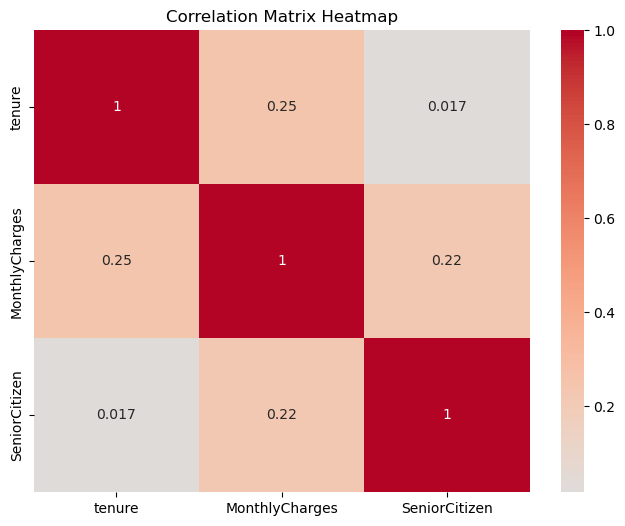

In [77]:
# Function to create a heatmap of the correlation matrix
def plot_correlation_heatmap(data):
    plt.figure(figsize=(8, 6))
    sns.heatmap(data, annot=True, cmap="coolwarm", center=0)
    plt.title("Correlation Matrix Heatmap")
    plt.show()

# Calling the function to plot the heatmap
plot_correlation_heatmap(correlation_matrix)

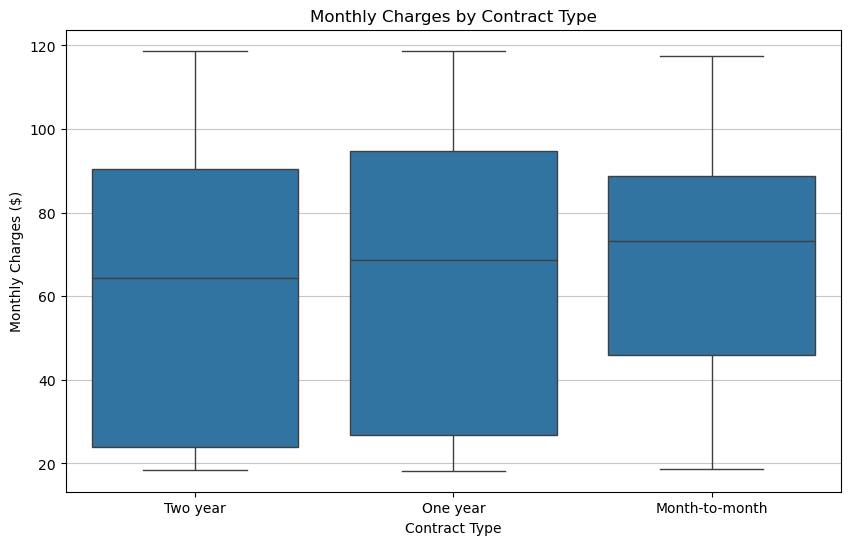

In [128]:
# Function to create a box plot of MonthlyCharges by Contract type
def plot_box_monthly_charges_by_contract(data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Contract', y='MonthlyCharges', data=data)
    plt.title("Monthly Charges by Contract Type")
    plt.xlabel("Contract Type")
    plt.ylabel("Monthly Charges ($)")
    plt.grid(axis='y', alpha=0.7)
    plt.show()

# Calling the function
plot_box_monthly_charges_by_contract(df)

